# Data Exploration And Analysis

---

In this notebook, we are going to work on the comprehension of the data put at our disposition.

For that, we will structure our reflection around two steps:
* Exploration
* Analysis

ASHRAE and Kaggle had provided to us 6 tabular data files:
* *building_metadata.csv*: Key characteristics of the buildings taken into account for the study(building identification, primary category of activities, gross floor area, opening year and number of floors);
* *sample_submission.csv*: Correct format for submitting predictions for the challenge;
* *test.csv*: Testing set (building identification, primary category of activities and timestamp);
* *train.csv*: Training set (building identification, primary category of activities, timestamp and energy consumption);
* *weather_test.csv*: Weather data from a meteorological station as close as possible to the site (building identification, timestamp, air temperature, dew temperature, cloud coverage, precipitation depth in the hour, sea level pressure, wind direction, wind speed);
* *weather_train.csv*: Weather data from a meteorological station as close as possible to the site (building identification, timestamp, air temperature, dew temperature, cloud coverage, precipitation depth in the hour, sea level pressure, wind direction, wind speed).

*Nota Bene:* If tabular data files *sample_submission.csv*, *test.csv* and *weather_test.csv* had their interest in the context of the challenge, here, we can discard them of our analysis: They don't contain usable information (energy consumption is not provided), and, so, are not relevant anymore.

As always, the prerequisite step consists on loading the appropriate packages to perform our work:

In [1]:
# Needed packages:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

---

## *building_metadata.csv*

### Exploration

In [2]:
# Load the data:
building_metadata = pd.read_csv("../data/building_metadata.csv")

# Check basic info:
print("*** Some basic info:")
print("'building_metadata' has {} data points with {} variables each.".format(*building_metadata.shape))
print("'building_metadata' counts {} missing values.".format(building_metadata.isnull().sum().sum()))

# Give a look to the first lines:
print("\n*** First lines:")
display(building_metadata.head(n=10))

# Give a look to the last lines:
print("\n*** Last lines:")
display(building_metadata.tail(n=10))

*** Some basic info:
'building_metadata' has 1449 data points with 6 variables each.
'building_metadata' counts 1868 missing values.

*** First lines:


,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
5,0,5,Education,8000,2000.0,NaN
6,0,6,Lodging/residential,27926,1981.0,NaN
7,0,7,Education,121074,1989.0,NaN
8,0,8,Education,60809,2003.0,NaN
9,0,9,Office,27000,2010.0,NaN



*** Last lines:


,site_id,building_id,primary_use,square_feet,year_built,floor_count
1439,15,1439,Education,56497,1957.0,NaN
1440,15,1440,Lodging/residential,150294,1987.0,NaN
1441,15,1441,Education,30143,1951.0,NaN
1442,15,1442,Public services,99541,1993.0,NaN
1443,15,1443,Education,40311,1913.0,NaN
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN
1448,15,1448,Office,92271,2001.0,NaN


Let's perform some additional checks.

In [3]:
# Determine unique values by columns:
building_metadata_cols = []
for col in building_metadata.columns:
    building_metadata_cols.append(col)
print("*** Additional checks:")
for col in building_metadata_cols:
    print("\n- Column '{}' possible values:\n{}".format(col, building_metadata[col].unique().tolist()))

*** Additional checks:

- Column 'site_id' possible values:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

- Column 'building_id' possible values:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190

In [4]:
# Further checks on unique and missing values by columns:
site_id_null = building_metadata['site_id'].isnull().sum()
site_id_unique = len(building_metadata['site_id'].unique().tolist())
building_id_null = building_metadata['building_id'].isnull().sum()
building_id_unique = len(building_metadata['building_id'].unique().tolist())
primary_use_null = building_metadata['primary_use'].isnull().sum()
primary_use_unique = len(building_metadata['primary_use'].unique().tolist())
square_feet_null = building_metadata['square_feet'].isnull().sum()
square_feet_unique = len(building_metadata['square_feet'].unique().tolist())
year_built_null = building_metadata['year_built'].isnull().sum()
year_built_unique = len(building_metadata['year_built'].unique().tolist())
floor_count_null = building_metadata['floor_count'].isnull().sum()
floor_count_unique = len(building_metadata['floor_count'].unique().tolist())

# Display results:
print("*** Further details:")
print("- 'site_id' counts {} missing values and {} unique IDs.".format(site_id_null, site_id_unique))
print("- 'building_id' counts {} missing values and has {} unique IDs.".format(building_id_null, building_id_unique))
print("- 'primary_use' counts {} missing values and has {} possible values.".format(primary_use_null, primary_use_unique))
print("- 'square_feet' counts {} missing values and has {} possible values.".format(square_feet_null, square_feet_unique))
print("- 'year_built' counts {} missing values and has {} possible values.".format(year_built_null, year_built_unique))
print("- 'floor_count' counts {} missing values and has {} possible values.".format(floor_count_null, floor_count_unique))

*** Further details:
- 'site_id' counts 0 missing values and 16 unique IDs.
- 'building_id' counts 0 missing values and has 1449 unique IDs.
- 'primary_use' counts 0 missing values and has 16 possible values.
- 'square_feet' counts 0 missing values and has 1397 possible values.
- 'year_built' counts 774 missing values and has 117 possible values.
- 'floor_count' counts 1094 missing values and has 19 possible values.


We can observe that the missing values are concentrated into two columns, `year_built`and `floor_count`, and represent a significant proportion of registered values for them (respectively 53.42% and 75.50%): This is a serious issue that we will discuss latter.

Before of that, we can display some visualizations linked to buildings primary use repartition, buildings repartition by site ID, and buildings gross floor area:

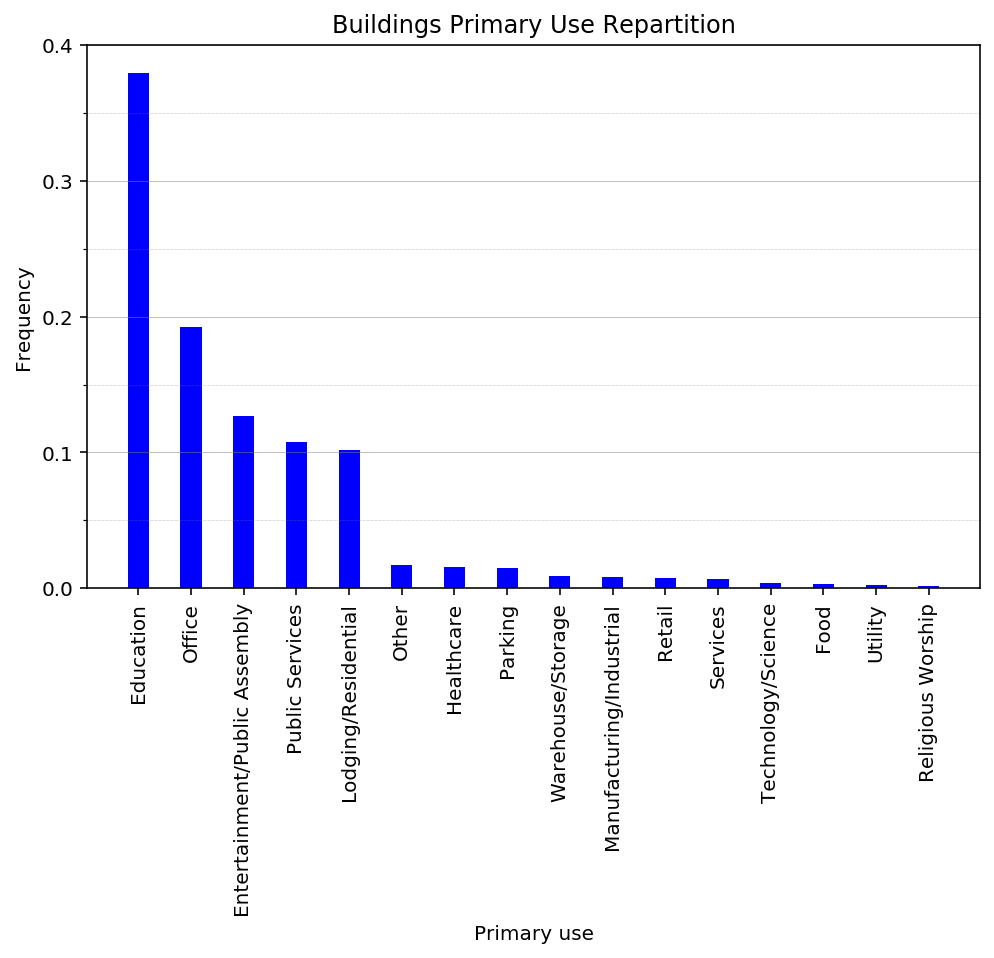

In [5]:
# Buildings primary use repartition:

# Set abscissa and ordinate values:
primary_use = building_metadata['primary_use']
primary_use_dict = {'Education': 'Education',
                    'Lodging/residential': 'Lodging/Residential',
                    'Office': 'Office',
                    'Entertainment/public assembly': 'Entertainment/Public Assembly',
                    'Other': 'Other',
                    'Retail': 'Retail',
                    'Parking': 'Parking',
                    'Public services': 'Public Services',
                    'Warehouse/storage': 'Warehouse/Storage',
                    'Food sales and service': 'Food',
                    'Religious worship': 'Religious Worship',
                    'Healthcare': 'Healthcare',
                    'Utility': 'Utility',
                    'Technology/science': 'Technology/Science',
                    'Manufacturing/industrial': 'Manufacturing/Industrial',
                    'Services': 'Services'}
primary_use_list = [primary_use_dict[x] for x in primary_use.value_counts().index.tolist()]
primary_use_frequency = [float(x)/primary_use.value_counts().sum() for x in primary_use.value_counts().tolist()]

# Define figure:
fig, ax = plt.subplots(figsize=(8, 5))
x_values = np.arange(16)
width_rec = 0.4

# Configuration of the graph:
ax.set_title("Buildings Primary Use Repartition")
ax.bar(x_values,
       primary_use_frequency,
       width=width_rec,
       color='blue')
ax.set_xticks(x_values)
ax.set_xticklabels(primary_use_list, rotation=90)
ax.set_xlabel("Primary use")
ax.set_ylim(0, 0.4)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
ax.set_ylabel('Frequency')
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)

# Save the graph:
fig.savefig('../graphs/buildings_primary_use_repartition.png', bbox_inches='tight')

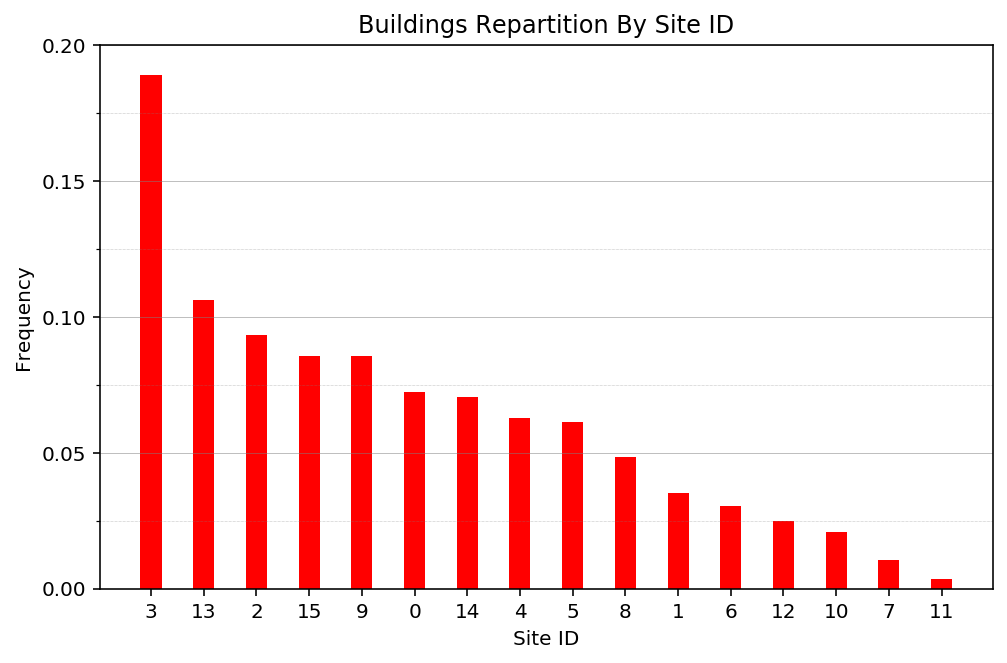

In [6]:
# Buildings repartition by site ID:

# Set abscissa and ordinate values:
site_id = building_metadata['site_id']
site_id_dict = {0: '0',
                1: '1',
                2: '2',
                3: '3',
                4: '4',
                5: '5',
                6: '6',
                7: '7',
                8: '8',
                9: '9',
                10: '10',
                11: '11',
                12: '12',
                13: '13',
                14: '14',
                15: '15'}
site_id_list = [site_id_dict[x] for x in site_id.value_counts().index.tolist()]
site_id_frequency = [float(x)/site_id.value_counts().sum() for x in site_id.value_counts().tolist()]

# Define figure:
fig, ax = plt.subplots(figsize=(8, 5))
x_values = np.arange(16)
width_rec = 0.4

# Configuration of the graph:
ax.set_title("Buildings Repartition By Site ID")
ax.bar(x_values,
       site_id_frequency,
       width=width_rec,
       color='red')
ax.set_xticks(x_values)
ax.set_xticklabels(site_id_list)
ax.set_xlabel("Site ID")
ax.set_ylim(0, 0.2)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
ax.set_ylabel('Frequency')
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)

# Save the graph:
fig.savefig('../graphs/buildings_repartition_by_site_id.png', bbox_inches='tight')

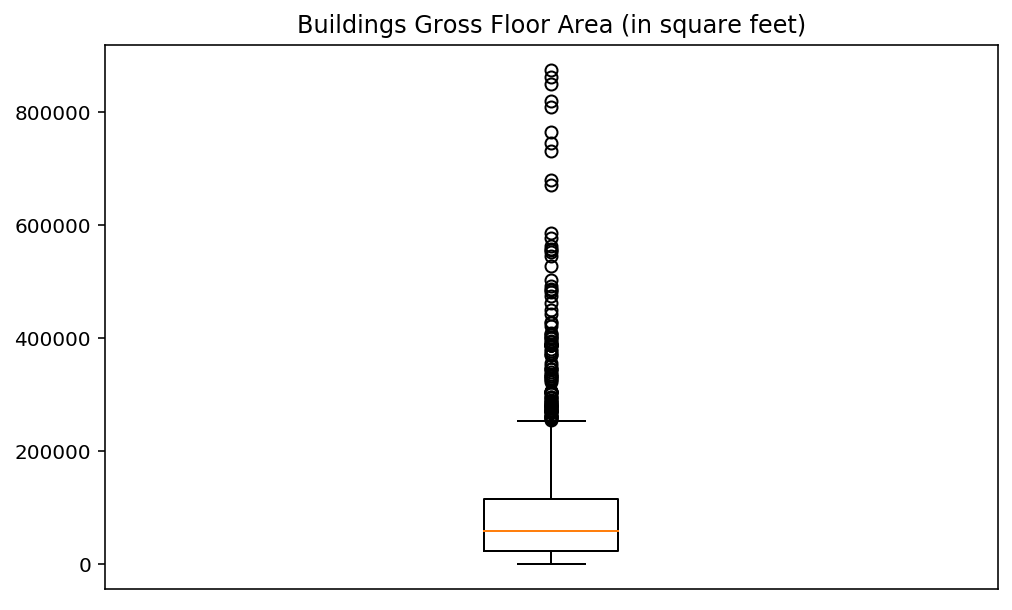

In [7]:
# Buildings gross floor area:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Buildings Gross Floor Area (in square feet)")
square_feet = building_metadata['square_feet']
ax.boxplot(square_feet)
ax.get_xaxis().set_visible(False)
fig.savefig('../graphs/buildings_gross_floor_area.png', bbox_inches='tight')

In [8]:
# Display a description of the buildings gross floor area feature:
display(square_feet.describe())

count      1449.000000
mean      92111.776398
std      110769.950997
min         283.000000
25%       23012.000000
50%       57673.000000
75%      115676.000000
max      875000.000000
Name: square_feet, dtype: float64

In [9]:
# Determine number of outliers:
p_25, p_75 = np.percentile(square_feet, [25, 75])
iqr = p_75 - p_25
lower_bound, upper_bound  = p_25 - 1.5 * iqr, p_75 + 1.5 * iqr
square_feet_outliers = 0
for i in square_feet:
    if (i < lower_bound) or (i > upper_bound):
        square_feet_outliers = square_feet_outliers + 1
print("*** 'square_feet' feature counts {} outliers.".format(square_feet_outliers))

*** 'square_feet' feature counts 106 outliers.


The perspectives are not good, but let's give a look to `year_built`and `floor_count` columns:

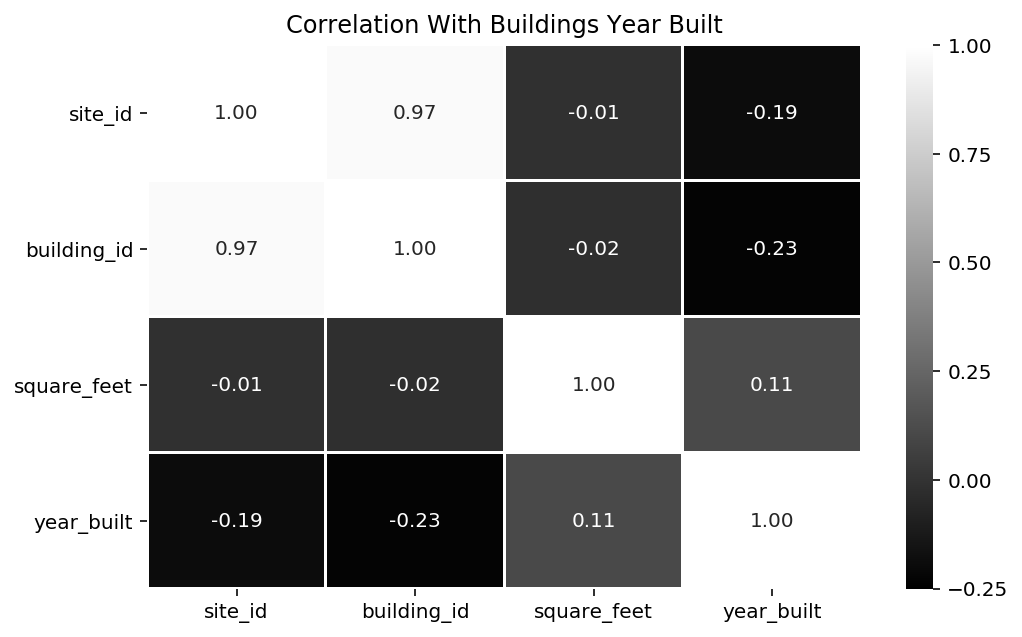

In [10]:
# Work on 'year_built' column:
year_built_tmp = building_metadata.drop('floor_count', axis=1)
year_built = year_built_tmp.dropna(axis=0)

# Visualize features correlation:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Correlation With Buildings Year Built")
sns.heatmap(year_built.corr(),
            fmt=".2f",
            annot=True,
            linewidths=1.,
            vmin=-0.25,
            vmax=1.00,
            cbar_kws=dict(ticks=[-0.25, 0.00, 0.25, 0.50, 0.75, 1.00]),
            cmap=plt.cm.gist_gray)
plt.yticks(rotation=0)
fig.savefig('../graphs/buildings_year_built.png', bbox_inches='tight')

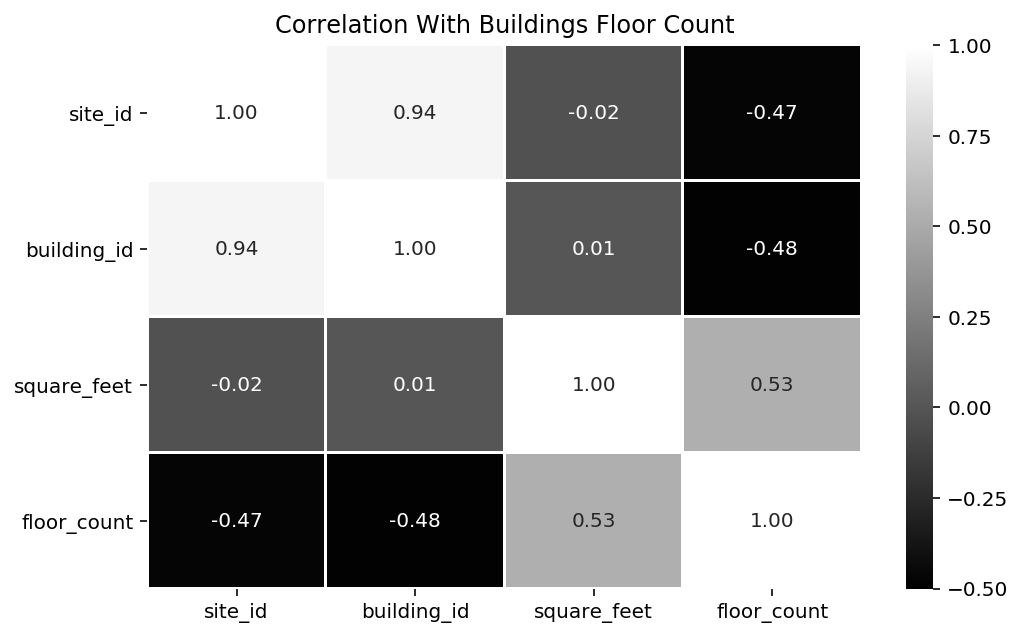

In [11]:
# Work on 'floor_count' column:
floor_count_tmp = building_metadata.drop('year_built', axis=1)
floor_count = floor_count_tmp.dropna(axis=0)

# Visualize features correlation:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Correlation With Buildings Floor Count")
sns.heatmap(floor_count.corr(),
            fmt=".2f",
            annot=True,
            linewidths=1.,
            vmin=-0.50,
            vmax=1.00,
            cbar_kws=dict(ticks=[-0.50, -0.25, 0.00, 0.25, 0.50, 0.75, 1.00]),
            cmap=plt.cm.gist_gray)
plt.yticks(rotation=0)
fig.savefig('../graphs/buildings_floor_count.png', bbox_inches='tight')

### Analysis

From the exploration work we have performed above, we can state some conclusions:
* It appears that for this study, the primary use of the buildings that have been taken into account is reparted around 16 categories, not very well balanced, with a large majority of them (more than a third) dedicated to education. We can suppose that this feature has a great incidence over a building energy consumption, independently of its other characteristics: Indeed, a building dedicated to education works a very different way from another dedicated to religious worship. Thus, it is quite probable that the prediction models we are going to build will present some kind of bias, due to the fact that they will be in a great part built thanks education buildings, and, so, will be consistant with this type of buildings, but probably not with other types of buildings.
* The buildings taken into account for this study are reparted around 16 different geographical sites, with their own specific weather conditions. As for previous conclusion, the observed repartition is not well balanced, thus, too, it is quite probable that the prediction models we are going to built will present some king of bias, due to the fact that during the training they will be more exposed to some specific weather conditions.
* Respectively to buildings gross floor area, we note approximately 7.32% of outliers.
* Buildings year built and buildings floor count features present a significant proportion of missing values (respectively 53.42% and 75.50%) and no strong correlation with the other features of the dataframe (element which would have helped us to replace them thanks to prediction). This is a serious issue, and here, we take the decision to discard these two features for our future work.

---

## *weather_train.csv*

### Exploration

In [12]:
# Load the data:
weather_train = pd.read_csv("../data/weather_train.csv")

# Check basic info:
print("*** Some basic info:")
print("'weather_train' has {} data points with {} variables each.".format(*weather_train.shape))
print("'weather_train' counts {} missing values.".format(weather_train.isnull().sum().sum()))

# Give a look to the first lines:
print("\n*** First lines:")
display(weather_train.head(n=10))

# Give a look to the last lines:
print("\n*** Last lines:")
display(weather_train.tail(n=10))

# Display a description of the dataframe:
print("\n*** Statistics summary:")
display(weather_train.describe())

*** Some basic info:
'weather_train' has 139773 data points with 9 variables each.
'weather_train' counts 136820 missing values.

*** First lines:


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
5,0,2016-01-01 05:00:00,19.4,NaN,19.4,0.0,NaN,0.0,0.0
6,0,2016-01-01 06:00:00,21.1,6.0,21.1,-1.0,1019.4,0.0,0.0
7,0,2016-01-01 07:00:00,21.1,NaN,21.1,0.0,1018.8,210.0,1.5
8,0,2016-01-01 08:00:00,20.6,NaN,20.0,0.0,1018.1,0.0,0.0
9,0,2016-01-01 09:00:00,21.1,NaN,20.6,0.0,1019.0,290.0,1.5



*** Last lines:


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
139763,15,2016-12-31 14:00:00,-2.8,NaN,-7.8,NaN,1013.4,170.0,5.7
139764,15,2016-12-31 15:00:00,-1.7,4.0,-7.2,NaN,1012.3,160.0,6.7
139765,15,2016-12-31 16:00:00,-0.6,0.0,-6.7,NaN,1011.1,170.0,7.2
139766,15,2016-12-31 17:00:00,2.2,NaN,-7.8,NaN,1009.1,180.0,7.7
139767,15,2016-12-31 18:00:00,2.8,NaN,-7.8,NaN,1007.7,180.0,8.2
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6
139772,15,2016-12-31 23:00:00,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8



*** Statistics summary:


,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000


Let's perform some additional checks on missing values.

In [13]:
# Further checks on missing values by columns:
site_id_null = weather_train['site_id'].isnull().sum()
timestamp_null = weather_train['timestamp'].isnull().sum()
air_temperature_null = weather_train['air_temperature'].isnull().sum()
cloud_coverage_null = weather_train['cloud_coverage'].isnull().sum()
dew_temperature_null = weather_train['dew_temperature'].isnull().sum()
precip_depth_1_hr_null = weather_train['precip_depth_1_hr'].isnull().sum()
sea_level_pressure_null = weather_train['sea_level_pressure'].isnull().sum()
wind_direction_null = weather_train['wind_direction'].isnull().sum()
wind_speed_null = weather_train['wind_speed'].isnull().sum()

# Display results:
print("*** Further details:")
print("- 'site_id' counts {} missing values (proportion: {:.2f}%).".format(site_id_null, float(site_id_null)/139773.*100.))
print("- 'timestamp' counts {} missing values (proportion: {:.2f}%).".format(timestamp_null, float(timestamp_null)/139773.*100.))
print("- 'air_temperature' counts {} missing values (proportion: {:.2f}%).".format(air_temperature_null, float(air_temperature_null)/139773.*100.))
print("- 'cloud_coverage' counts {} missing values (proportion: {:.2f}%).".format(cloud_coverage_null, float(cloud_coverage_null)/139773.*100.))
print("- 'dew_temperature' counts {} missing values (proportion: {:.2f}%).".format(dew_temperature_null, float(dew_temperature_null)/139773.*100.))
print("- 'precip_depth_1_hr' counts {} missing values (proportion: {:.2f}%).".format(precip_depth_1_hr_null, float(precip_depth_1_hr_null)/139773.*100.))
print("- 'sea_level_pressure' counts {} missing values (proportion: {:.2f}%).".format(sea_level_pressure_null, float(sea_level_pressure_null)/139773.*100.))
print("- 'wind_direction' counts {} missing values (proportion: {:.2f}%).".format(wind_direction_null, float(wind_direction_null)/139773.*100.))
print("- 'wind_speed' counts {} missing values (proportion: {:.2f}%).".format(wind_speed_null, float(wind_speed_null)/139773.*100.))

*** Further details:
- 'site_id' counts 0 missing values (proportion: 0.00%).
- 'timestamp' counts 0 missing values (proportion: 0.00%).
- 'air_temperature' counts 55 missing values (proportion: 0.04%).
- 'cloud_coverage' counts 69173 missing values (proportion: 49.49%).
- 'dew_temperature' counts 113 missing values (proportion: 0.08%).
- 'precip_depth_1_hr' counts 50289 missing values (proportion: 35.98%).
- 'sea_level_pressure' counts 10618 missing values (proportion: 7.60%).
- 'wind_direction' counts 6268 missing values (proportion: 4.48%).
- 'wind_speed' counts 304 missing values (proportion: 0.22%).


In [14]:
# Store key variables for plotting:

# Isolate weather data by site ID:
site_id_0 = weather_train.loc[weather_train['site_id']==0]
site_id_1 = weather_train.loc[weather_train['site_id']==1]
site_id_2 = weather_train.loc[weather_train['site_id']==2]
site_id_3 = weather_train.loc[weather_train['site_id']==3]
site_id_4 = weather_train.loc[weather_train['site_id']==4]
site_id_5 = weather_train.loc[weather_train['site_id']==5]
site_id_6 = weather_train.loc[weather_train['site_id']==6]
site_id_7 = weather_train.loc[weather_train['site_id']==7]
site_id_8 = weather_train.loc[weather_train['site_id']==8]
site_id_9 = weather_train.loc[weather_train['site_id']==9]
site_id_10 = weather_train.loc[weather_train['site_id']==10]
site_id_11 = weather_train.loc[weather_train['site_id']==11]
site_id_12 = weather_train.loc[weather_train['site_id']==12]
site_id_13 = weather_train.loc[weather_train['site_id']==13]
site_id_14 = weather_train.loc[weather_train['site_id']==14]
site_id_15 = weather_train.loc[weather_train['site_id']==15]

# Isolate timestamps by site ID:
timestamp_0 = pd.to_datetime(site_id_0['timestamp'])
timestamp_1 = pd.to_datetime(site_id_1['timestamp'])
timestamp_2 = pd.to_datetime(site_id_2['timestamp'])
timestamp_3 = pd.to_datetime(site_id_3['timestamp'])
timestamp_4 = pd.to_datetime(site_id_4['timestamp'])
timestamp_5 = pd.to_datetime(site_id_5['timestamp'])
timestamp_6 = pd.to_datetime(site_id_6['timestamp'])
timestamp_7 = pd.to_datetime(site_id_7['timestamp'])
timestamp_8 = pd.to_datetime(site_id_8['timestamp'])
timestamp_9 = pd.to_datetime(site_id_9['timestamp'])
timestamp_10 = pd.to_datetime(site_id_10['timestamp'])
timestamp_11 = pd.to_datetime(site_id_11['timestamp'])
timestamp_12 = pd.to_datetime(site_id_12['timestamp'])
timestamp_13 = pd.to_datetime(site_id_13['timestamp'])
timestamp_14 = pd.to_datetime(site_id_14['timestamp'])
timestamp_15 = pd.to_datetime(site_id_15['timestamp'])

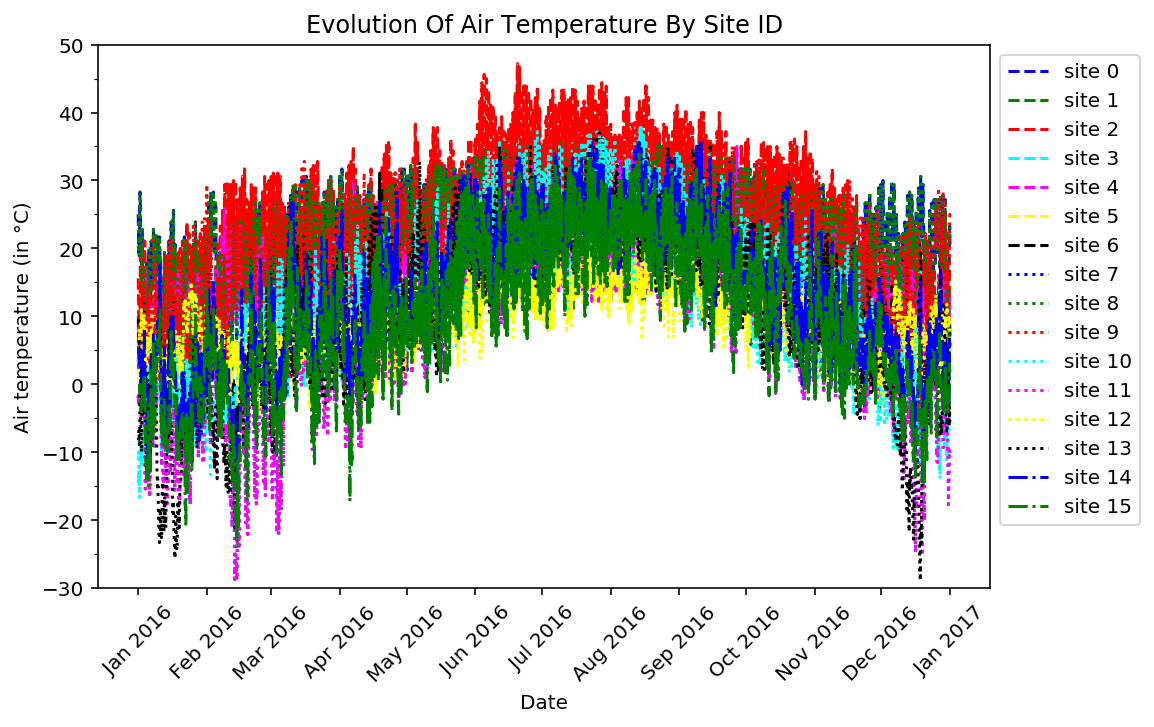

In [15]:
# Configure some variables:
air_temperature_0 = site_id_0['air_temperature'].tolist()
air_temperature_1 = site_id_1['air_temperature'].tolist()
air_temperature_2 = site_id_2['air_temperature'].tolist()
air_temperature_3 = site_id_3['air_temperature'].tolist()
air_temperature_4 = site_id_4['air_temperature'].tolist()
air_temperature_5 = site_id_5['air_temperature'].tolist()
air_temperature_6 = site_id_6['air_temperature'].tolist()
air_temperature_7 = site_id_7['air_temperature'].tolist()
air_temperature_8 = site_id_8['air_temperature'].tolist()
air_temperature_9 = site_id_9['air_temperature'].tolist()
air_temperature_10 = site_id_10['air_temperature'].tolist()
air_temperature_11 = site_id_11['air_temperature'].tolist()
air_temperature_12 = site_id_12['air_temperature'].tolist()
air_temperature_13 = site_id_13['air_temperature'].tolist()
air_temperature_14 = site_id_14['air_temperature'].tolist()
air_temperature_15 = site_id_15['air_temperature'].tolist()

# Definition of the graph:
fig, ax = plt.subplots(figsize=(8, 5))

# Configuration of the graph:
ax.set_title("Evolution Of Air Temperature By Site ID")
ax.plot(timestamp_0, air_temperature_0, color='blue', linestyle='dashed', label='site 0')
ax.plot(timestamp_1, air_temperature_1, color='green', linestyle='dashed', label='site 1')
ax.plot(timestamp_2, air_temperature_2, color='red', linestyle='dashed', label='site 2')
ax.plot(timestamp_3, air_temperature_3, color='cyan', linestyle='dashed', label='site 3')
ax.plot(timestamp_4, air_temperature_4, color='magenta', linestyle='dashed', label='site 4')
ax.plot(timestamp_5, air_temperature_5, color='yellow', linestyle='dashed', label='site 5')
ax.plot(timestamp_6, air_temperature_6, color='black', linestyle='dashed', label='site 6')
ax.plot(timestamp_7, air_temperature_7, color='blue', linestyle='dotted', label='site 7')
ax.plot(timestamp_8, air_temperature_8, color='green', linestyle='dotted', label='site 8')
ax.plot(timestamp_9, air_temperature_9, color='red', linestyle='dotted', label='site 9')
ax.plot(timestamp_10, air_temperature_10, color='cyan', linestyle='dotted', label='site 10')
ax.plot(timestamp_11, air_temperature_11, color='magenta', linestyle='dotted', label='site 11')
ax.plot(timestamp_12, air_temperature_12, color='yellow', linestyle='dotted', label='site 12')
ax.plot(timestamp_13, air_temperature_13, color='black', linestyle='dotted', label='site 13')
ax.plot(timestamp_14, air_temperature_14, color='blue', linestyle='dashdot', label='site 14')
ax.plot(timestamp_15, air_temperature_15, color='green', linestyle='dashdot', label='site 15')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel('Date')
ax.set_ylim(-30, 50)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(9))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(17))
ax.set_ylabel('Air temperature (in °C)')
ax.legend(bbox_to_anchor=(1, 1))

# Save the graph:
fig.savefig('../graphs/evolution_air_temperature_by_site_id.png', bbox_inches='tight')

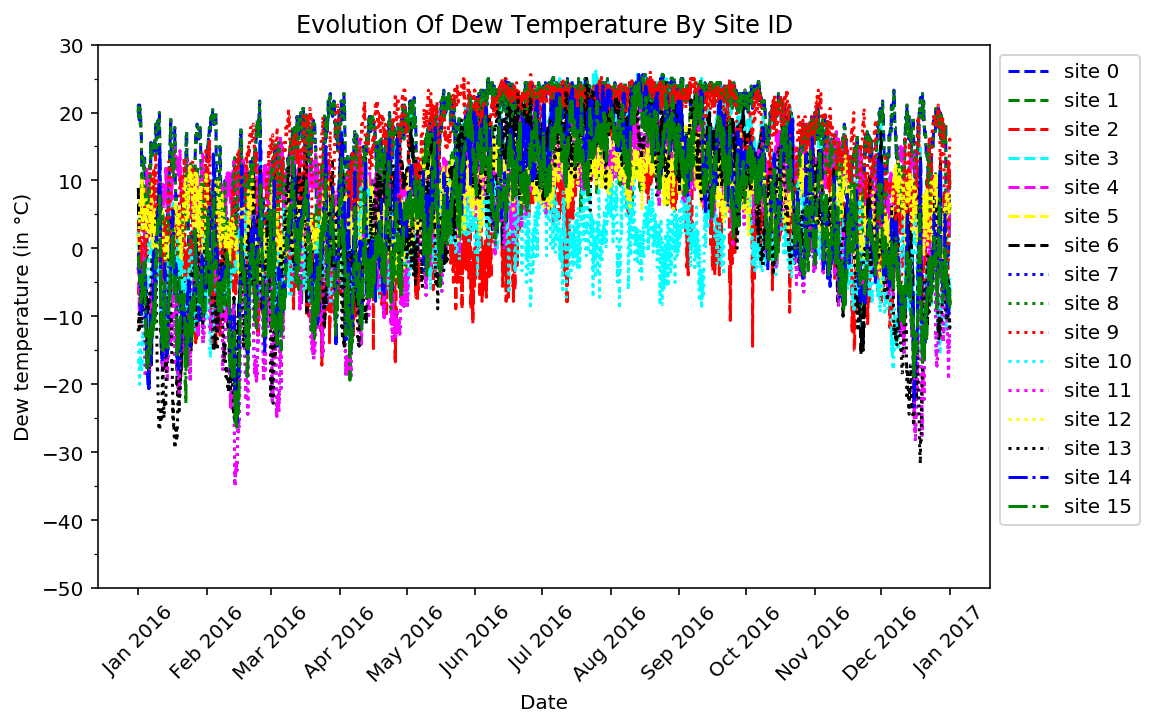

In [16]:
# Configure some variables:
dew_temperature_0 = site_id_0['dew_temperature'].tolist()
dew_temperature_1 = site_id_1['dew_temperature'].tolist()
dew_temperature_2 = site_id_2['dew_temperature'].tolist()
dew_temperature_3 = site_id_3['dew_temperature'].tolist()
dew_temperature_4 = site_id_4['dew_temperature'].tolist()
dew_temperature_5 = site_id_5['dew_temperature'].tolist()
dew_temperature_6 = site_id_6['dew_temperature'].tolist()
dew_temperature_7 = site_id_7['dew_temperature'].tolist()
dew_temperature_8 = site_id_8['dew_temperature'].tolist()
dew_temperature_9 = site_id_9['dew_temperature'].tolist()
dew_temperature_10 = site_id_10['dew_temperature'].tolist()
dew_temperature_11 = site_id_11['dew_temperature'].tolist()
dew_temperature_12 = site_id_12['dew_temperature'].tolist()
dew_temperature_13 = site_id_13['dew_temperature'].tolist()
dew_temperature_14 = site_id_14['dew_temperature'].tolist()
dew_temperature_15 = site_id_15['dew_temperature'].tolist()

# Definition of the graph:
fig, ax = plt.subplots(figsize=(8, 5))

# Configuration of the graph:
ax.set_title("Evolution Of Dew Temperature By Site ID")
ax.plot(timestamp_0, dew_temperature_0, color='blue', linestyle='dashed', label='site 0')
ax.plot(timestamp_1, dew_temperature_1, color='green', linestyle='dashed', label='site 1')
ax.plot(timestamp_2, dew_temperature_2, color='red', linestyle='dashed', label='site 2')
ax.plot(timestamp_3, dew_temperature_3, color='cyan', linestyle='dashed', label='site 3')
ax.plot(timestamp_4, dew_temperature_4, color='magenta', linestyle='dashed', label='site 4')
ax.plot(timestamp_5, dew_temperature_5, color='yellow', linestyle='dashed', label='site 5')
ax.plot(timestamp_6, dew_temperature_6, color='black', linestyle='dashed', label='site 6')
ax.plot(timestamp_7, dew_temperature_7, color='blue', linestyle='dotted', label='site 7')
ax.plot(timestamp_8, dew_temperature_8, color='green', linestyle='dotted', label='site 8')
ax.plot(timestamp_9, dew_temperature_9, color='red', linestyle='dotted', label='site 9')
ax.plot(timestamp_10, dew_temperature_10, color='cyan', linestyle='dotted', label='site 10')
ax.plot(timestamp_11, dew_temperature_11, color='magenta', linestyle='dotted', label='site 11')
ax.plot(timestamp_12, dew_temperature_12, color='yellow', linestyle='dotted', label='site 12')
ax.plot(timestamp_13, dew_temperature_13, color='black', linestyle='dotted', label='site 13')
ax.plot(timestamp_14, dew_temperature_14, color='blue', linestyle='dashdot', label='site 14')
ax.plot(timestamp_15, dew_temperature_15, color='green', linestyle='dashdot', label='site 15')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel('Date')
ax.set_ylim(-50, 30)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(9))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(17))
ax.set_ylabel('Dew temperature (in °C)')
ax.legend(bbox_to_anchor=(1, 1))

# Save the graph:
fig.savefig('../graphs/evolution_dew_temperature_by_site_id.png', bbox_inches='tight')

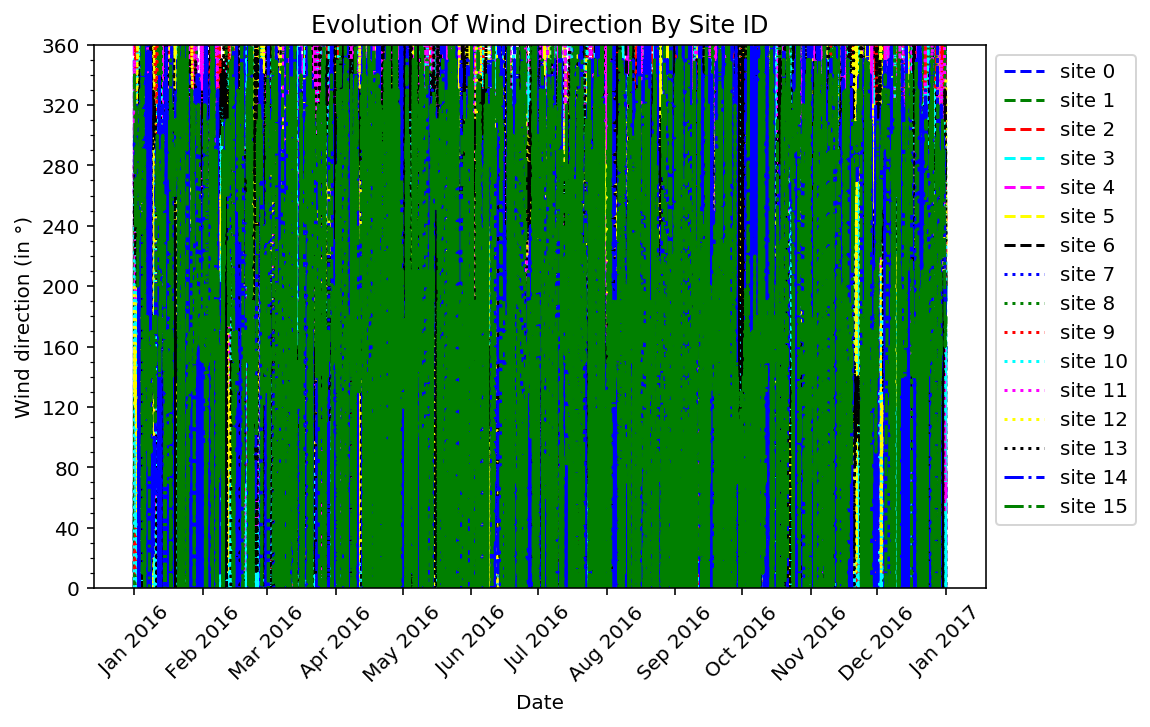

In [17]:
# Configure some variables:
wind_direction_0 = site_id_0['wind_direction'].tolist()
wind_direction_1 = site_id_1['wind_direction'].tolist()
wind_direction_2 = site_id_2['wind_direction'].tolist()
wind_direction_3 = site_id_3['wind_direction'].tolist()
wind_direction_4 = site_id_4['wind_direction'].tolist()
wind_direction_5 = site_id_5['wind_direction'].tolist()
wind_direction_6 = site_id_6['wind_direction'].tolist()
wind_direction_7 = site_id_7['wind_direction'].tolist()
wind_direction_8 = site_id_8['wind_direction'].tolist()
wind_direction_9 = site_id_9['wind_direction'].tolist()
wind_direction_10 = site_id_10['wind_direction'].tolist()
wind_direction_11 = site_id_11['wind_direction'].tolist()
wind_direction_12 = site_id_12['wind_direction'].tolist()
wind_direction_13 = site_id_13['wind_direction'].tolist()
wind_direction_14 = site_id_14['wind_direction'].tolist()
wind_direction_15 = site_id_15['wind_direction'].tolist()

# Definition of the graph:
fig, ax = plt.subplots(figsize=(8, 5))

# Configuration of the graph:
ax.set_title("Evolution Of Wind Direction By Site ID")
ax.plot(timestamp_0, wind_direction_0, color='blue', linestyle='dashed', label='site 0')
ax.plot(timestamp_1, wind_direction_1, color='green', linestyle='dashed', label='site 1')
ax.plot(timestamp_2, wind_direction_2, color='red', linestyle='dashed', label='site 2')
ax.plot(timestamp_3, wind_direction_3, color='cyan', linestyle='dashed', label='site 3')
ax.plot(timestamp_4, wind_direction_4, color='magenta', linestyle='dashed', label='site 4')
ax.plot(timestamp_5, wind_direction_5, color='yellow', linestyle='dashed', label='site 5')
ax.plot(timestamp_6, wind_direction_6, color='black', linestyle='dashed', label='site 6')
ax.plot(timestamp_7, wind_direction_7, color='blue', linestyle='dotted', label='site 7')
ax.plot(timestamp_8, wind_direction_8, color='green', linestyle='dotted', label='site 8')
ax.plot(timestamp_9, wind_direction_9, color='red', linestyle='dotted', label='site 9')
ax.plot(timestamp_10, wind_direction_10, color='cyan', linestyle='dotted', label='site 10')
ax.plot(timestamp_11, wind_direction_11, color='magenta', linestyle='dotted', label='site 11')
ax.plot(timestamp_12, wind_direction_12, color='yellow', linestyle='dotted', label='site 12')
ax.plot(timestamp_13, wind_direction_13, color='black', linestyle='dotted', label='site 13')
ax.plot(timestamp_14, wind_direction_14, color='blue', linestyle='dashdot', label='site 14')
ax.plot(timestamp_15, wind_direction_15, color='green', linestyle='dashdot', label='site 15')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel('Date')
ax.set_ylim(0, 360)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(37))
ax.set_ylabel('Wind direction (in °)')
ax.legend(bbox_to_anchor=(1, 1))

# Save the graph:
fig.savefig('../graphs/evolution_wind_direction_by_site_id.png', bbox_inches='tight')

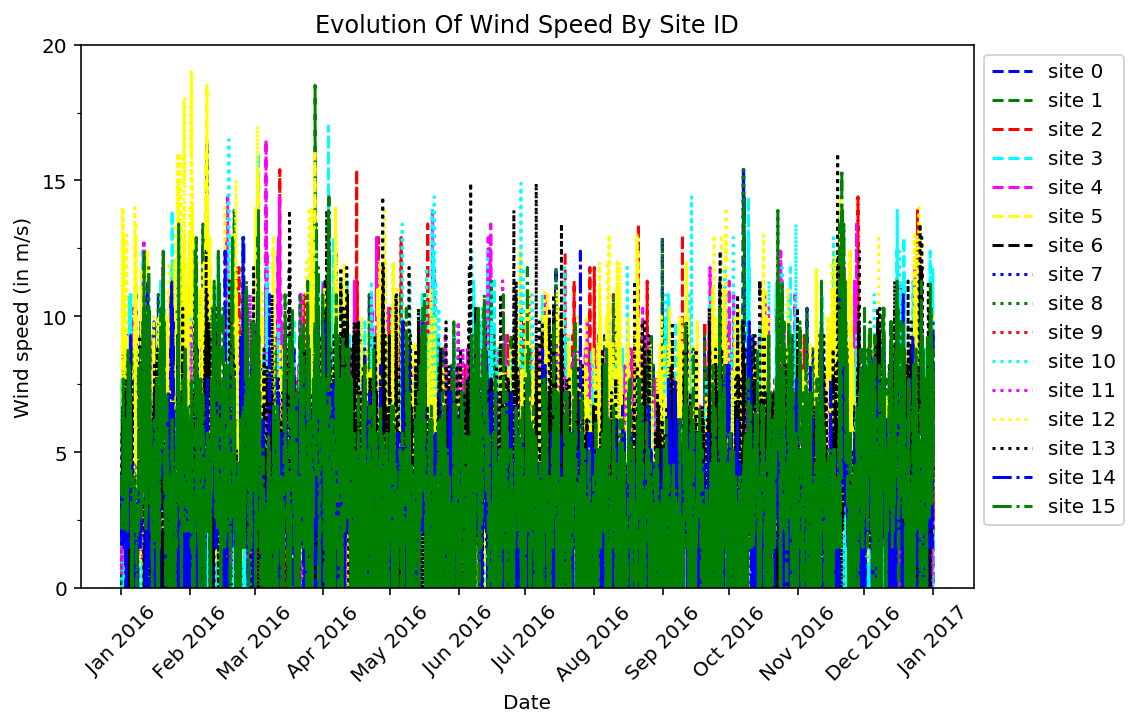

In [18]:
# Configure some variables:
wind_speed_0 = site_id_0['wind_speed'].tolist()
wind_speed_1 = site_id_1['wind_speed'].tolist()
wind_speed_2 = site_id_2['wind_speed'].tolist()
wind_speed_3 = site_id_3['wind_speed'].tolist()
wind_speed_4 = site_id_4['wind_speed'].tolist()
wind_speed_5 = site_id_5['wind_speed'].tolist()
wind_speed_6 = site_id_6['wind_speed'].tolist()
wind_speed_7 = site_id_7['wind_speed'].tolist()
wind_speed_8 = site_id_8['wind_speed'].tolist()
wind_speed_9 = site_id_9['wind_speed'].tolist()
wind_speed_10 = site_id_10['wind_speed'].tolist()
wind_speed_11 = site_id_11['wind_speed'].tolist()
wind_speed_12 = site_id_12['wind_speed'].tolist()
wind_speed_13 = site_id_13['wind_speed'].tolist()
wind_speed_14 = site_id_14['wind_speed'].tolist()
wind_speed_15 = site_id_15['wind_speed'].tolist()

# Definition of the graph:
fig, ax = plt.subplots(figsize=(8, 5))

# Configuration of the graph:
ax.set_title("Evolution Of Wind Speed By Site ID")
ax.plot(timestamp_0, wind_speed_0, color='blue', linestyle='dashed', label='site 0')
ax.plot(timestamp_1, wind_speed_1, color='green', linestyle='dashed', label='site 1')
ax.plot(timestamp_2, wind_speed_2, color='red', linestyle='dashed', label='site 2')
ax.plot(timestamp_3, wind_speed_3, color='cyan', linestyle='dashed', label='site 3')
ax.plot(timestamp_4, wind_speed_4, color='magenta', linestyle='dashed', label='site 4')
ax.plot(timestamp_5, wind_speed_5, color='yellow', linestyle='dashed', label='site 5')
ax.plot(timestamp_6, wind_speed_6, color='black', linestyle='dashed', label='site 6')
ax.plot(timestamp_7, wind_speed_7, color='blue', linestyle='dotted', label='site 7')
ax.plot(timestamp_8, wind_speed_8, color='green', linestyle='dotted', label='site 8')
ax.plot(timestamp_9, wind_speed_9, color='red', linestyle='dotted', label='site 9')
ax.plot(timestamp_10, wind_speed_10, color='cyan', linestyle='dotted', label='site 10')
ax.plot(timestamp_11, wind_speed_11, color='magenta', linestyle='dotted', label='site 11')
ax.plot(timestamp_12, wind_speed_12, color='yellow', linestyle='dotted', label='site 12')
ax.plot(timestamp_13, wind_speed_13, color='black', linestyle='dotted', label='site 13')
ax.plot(timestamp_14, wind_speed_14, color='blue', linestyle='dashdot', label='site 14')
ax.plot(timestamp_15, wind_speed_15, color='green', linestyle='dashdot', label='site 15')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel('Date')
ax.set_ylim(0, 20)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
ax.set_ylabel('Wind speed (in m/s)')
ax.legend(bbox_to_anchor=(1, 1))

# Save the graph:
fig.savefig('../graphs/evolution_wind_speed_by_site_id.png', bbox_inches='tight')

### Analysis

From this exploration about weather conditions, some conclusions can be stated:
* `cloud_coverage`, `precip_depth_1_hr`, and to a lesser extent `sea_level_pressure` features count an import proportion of missing values (respectively 49.49%, 35.98% and 7.60%), while this is not the case for the other features (less than 5%). This is an issue for these features (for `cloud_coverage`, e.g., we can reasonably assume that the impact on electricity consumption to light a building is not insignificant). A reconstruction (thanks to interpolation methods e.g.) for these features would need further work to better understand physic laws that define them: Here, we take the decision to discard these three features for our future work.
* By site ID, evolutions of air temperature, dew temperature, wind direction and wind speed cover un important spectrum of possibilities, nonetheless, for air temperature, for exemple, depending of the month of the year and season, some common tendencies can be noted whatever the site ID considered: This will have an impact on the the prediction models we will build, indeed, they will be trained only on a limited number of months (characteristically, they won't be trained on autumn months), and they won't probably be able to catch year periodicity on the data and associated energy consumption. They won't probably be able to catch, too, certain epiphenomena (we have noted previously that more of the third of the buildings taken into account for this study have education as primary use, but these buildings use to be closed during Christmas and New Year holidays, element which provocs a discontinous and brutal change on energy consumption).

---

## *train.csv*

### Exploration

In [19]:
# Load the data:
train = pd.read_csv("../data/train.csv")

# Check basic info:
print("*** Some basic info:")
print("'train' has {} data points with {} variables each.".format(*train.shape))
print("'train' counts {} missing values.".format(train.isnull().sum().sum()))

# Give a look to the first lines:
print("\n*** First lines:")
display(train.head(n=10))

# Give a look to the last lines:
print("\n*** Last lines:")
display(train.tail(n=10))

*** Some basic info:
'train' has 20216100 data points with 4 variables each.
'train' counts 0 missing values.

*** First lines:


,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0
5,5,0,2016-01-01 00:00:00,0.0
6,6,0,2016-01-01 00:00:00,0.0
7,7,0,2016-01-01 00:00:00,0.0
8,8,0,2016-01-01 00:00:00,0.0
9,9,0,2016-01-01 00:00:00,0.0



*** Last lines:


,building_id,meter,timestamp,meter_reading
20216090,1440,0,2016-12-31 23:00:00,154.7500
20216091,1441,0,2016-12-31 23:00:00,242.9250
20216092,1442,0,2016-12-31 23:00:00,59.4000
20216093,1442,2,2016-12-31 23:00:00,55.6241
20216094,1443,0,2016-12-31 23:00:00,64.9500
20216095,1444,0,2016-12-31 23:00:00,8.7500
20216096,1445,0,2016-12-31 23:00:00,4.8250
20216097,1446,0,2016-12-31 23:00:00,0.0000
20216098,1447,0,2016-12-31 23:00:00,159.5750
20216099,1448,0,2016-12-31 23:00:00,2.8500


The dataframe counts an import number of data points, and, important element, no missing values. Let's go ahead with other checks.

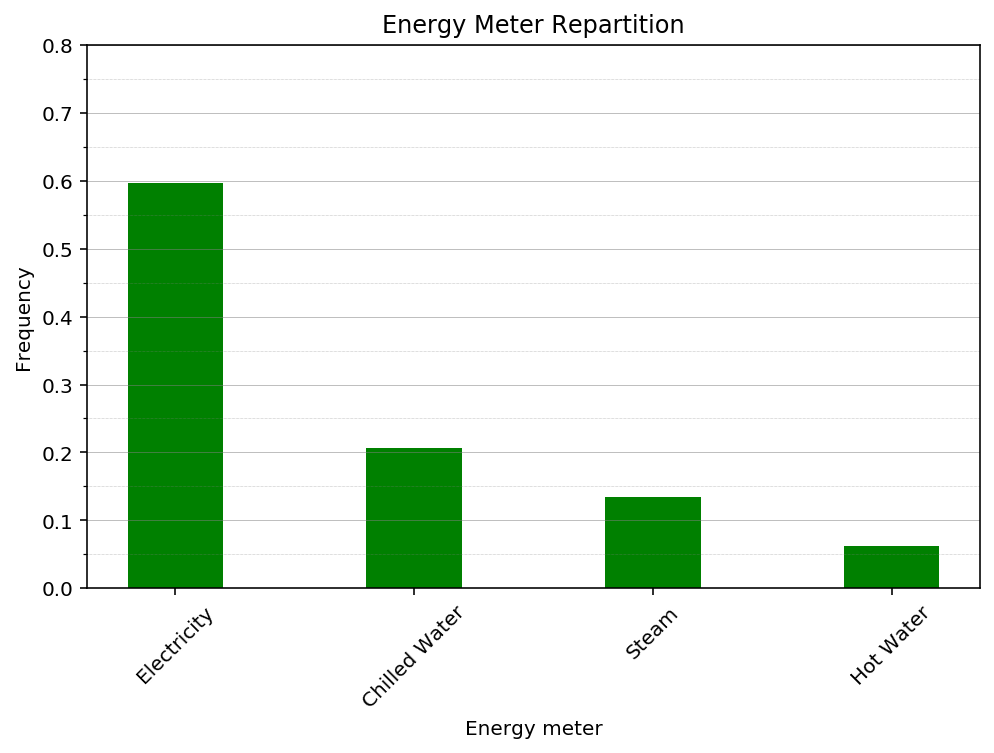

In [20]:
# Energy meter repartition:

# Set abscissa and ordinate values:
meter = train['meter']
meter_dict = {0: 'Electricity', 1: 'Chilled Water', 2: 'Steam', 3: 'Hot Water'}
meter_list = [meter_dict[x] for x in meter.value_counts().index.tolist()]
meter_frequency = [float(x)/meter.value_counts().sum() for x in meter.value_counts().tolist()]

# Define figure:
fig, ax = plt.subplots(figsize=(8, 5))
x_values = np.arange(4)
width_rec = 0.4

# Configuration of the graph:
ax.set_title("Energy Meter Repartition")
ax.bar(x_values,
       meter_frequency,
       width=width_rec,
       color='green')
ax.set_xticks(x_values)
ax.set_xticklabels(meter_list, rotation=45)
ax.set_xlabel("Energy meter")
ax.set_ylim(0, 0.8)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(8))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(16))
ax.set_ylabel('Frequency')
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)

# Save the graph:
fig.savefig('../graphs/energy_meter_repartition.png', bbox_inches='tight')

In [21]:
# Isolate train data energy meter:
meter_0 = train.loc[train['meter']==0]
electricity = meter_0['meter_reading']
meter_1 = train.loc[train['meter']==1]
chilled_water = meter_1['meter_reading']
meter_2 = train.loc[train['meter']==2]
steam = meter_2['meter_reading']
meter_3 = train.loc[train['meter']==3]
hot_water = meter_3['meter_reading']

*** Statistics summary for electricity consumption:


count    1.206091e+07
mean     1.708256e+02
std      3.808343e+02
min      0.000000e+00
25%      1.950000e+01
50%      6.283190e+01
75%      1.700750e+02
max      7.976900e+04
Name: meter_reading, dtype: float64


*** Electricity consumption counts 1294292 outliers (proportion: 10.73%).



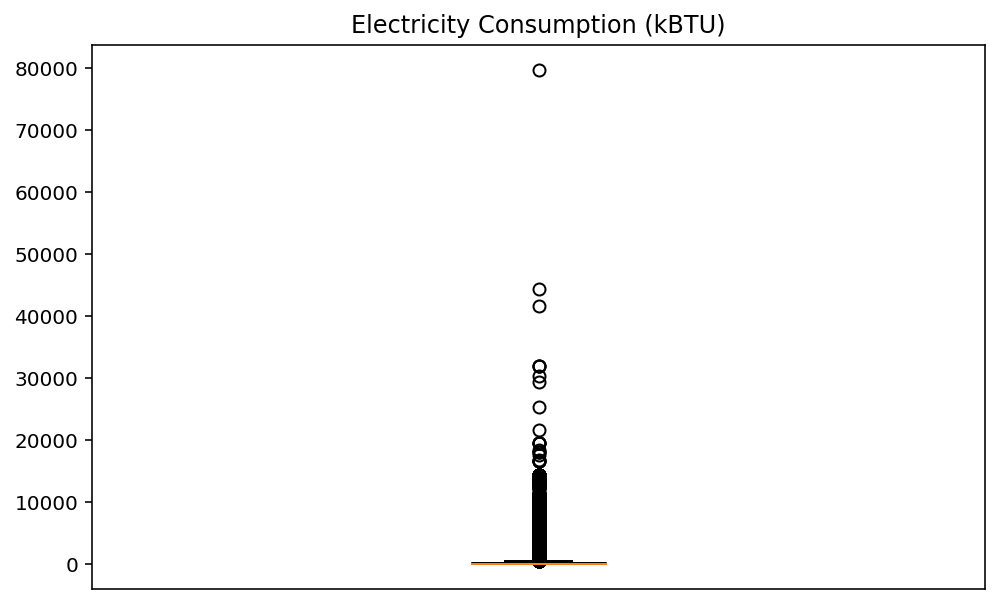

In [22]:
# Display a description of electricity consumption:
print("*** Statistics summary for electricity consumption:")
display(electricity.describe())

# Electricity consumption graph:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Electricity Consumption (kBTU)")
ax.boxplot(electricity)
ax.get_xaxis().set_visible(False)
fig.savefig('../graphs/electricity_consumption.png', bbox_inches='tight')

# Determine number of outliers:
p_25, p_75 = np.percentile(electricity, [25, 75])
iqr = p_75 - p_25
lower_bound, upper_bound  = p_25 - 1.5 * iqr, p_75 + 1.5 * iqr
electricity_outliers = 0
for i in electricity:
    if (i < lower_bound) or (i > upper_bound):
        electricity_outliers = electricity_outliers + 1
print("\n*** Electricity consumption counts {} outliers (proportion: {:.2f}%).\n".format(electricity_outliers, float(electricity_outliers)/len(electricity)*100.))

*** Statistics summary for chilled water consumption:


count    4.182440e+06
mean     6.333639e+02
std      7.988213e+03
min      0.000000e+00
25%      1.132880e+01
50%      1.204870e+02
75%      4.643140e+02
max      8.803740e+05
Name: meter_reading, dtype: float64


*** Chilled water consumption counts 466993 outliers (proportion: 11.17%).



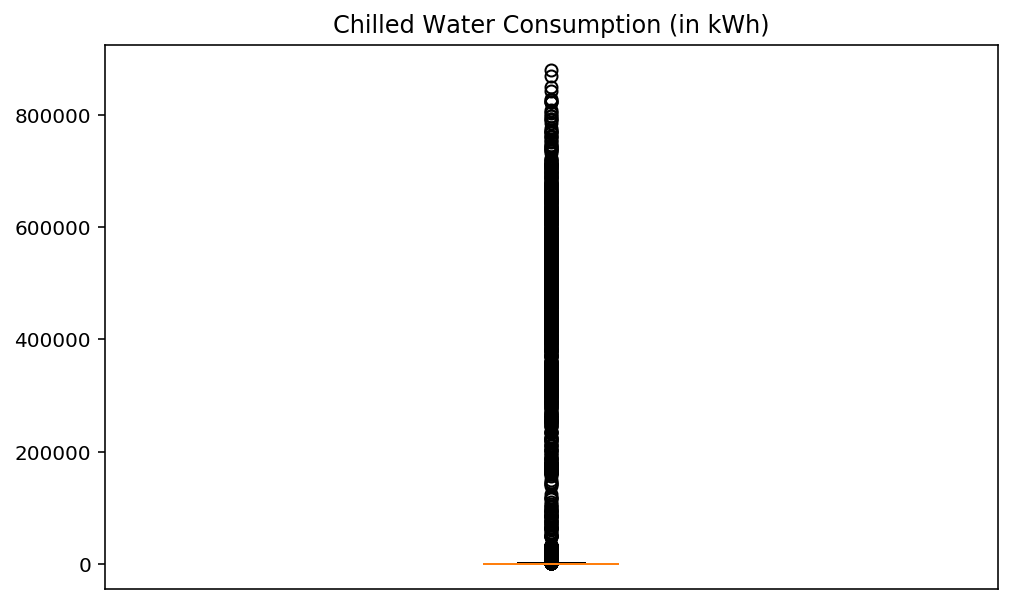

In [23]:
# Display a description of chilled water consumption:
print("*** Statistics summary for chilled water consumption:")
display(chilled_water.describe())

# Chilled water consumption graph:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Chilled Water Consumption (in kWh)")
ax.boxplot(chilled_water)
ax.get_xaxis().set_visible(False)
fig.savefig('../graphs/chilled_water_consumption.png', bbox_inches='tight')

# Determine number of outliers:
p_25, p_75 = np.percentile(chilled_water, [25, 75])
iqr = p_75 - p_25
lower_bound, upper_bound  = p_25 - 1.5 * iqr, p_75 + 1.5 * iqr
chilled_water_outliers = 0
for i in chilled_water:
    if (i < lower_bound) or (i > upper_bound):
        chilled_water_outliers = chilled_water_outliers + 1
print("\n*** Chilled water consumption counts {} outliers (proportion: {:.2f}%).\n".format(chilled_water_outliers, float(chilled_water_outliers)/len(chilled_water)*100.))

*** Statistics summary for steam consumption:


count    2.708713e+06
mean     1.388219e+04
std      4.183135e+05
min      0.000000e+00
25%      4.575000e+01
50%      2.578120e+02
75%      1.035320e+03
max      2.190470e+07
Name: meter_reading, dtype: float64


*** Steam consumption counts 339677 outliers (proportion: 12.54%).



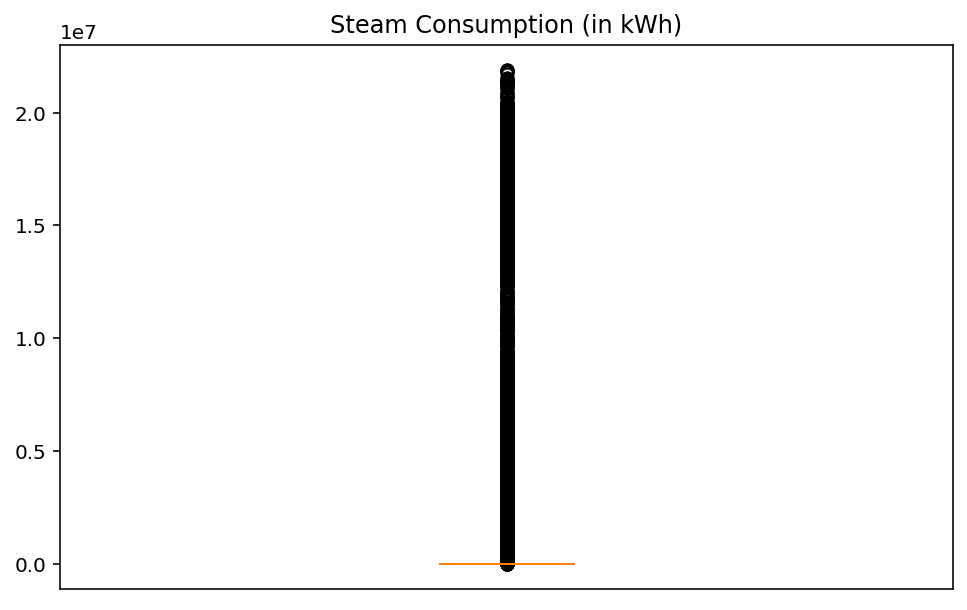

In [24]:
# Display a description of steam consumption:
print("*** Statistics summary for steam consumption:")
display(steam.describe())

# Steam consumption graph:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Steam Consumption (in kWh)")
ax.boxplot(steam)
ax.get_xaxis().set_visible(False)
fig.savefig('../graphs/steam_consumption.png', bbox_inches='tight')

# Determine number of outliers:
p_25, p_75 = np.percentile(steam, [25, 75])
iqr = p_75 - p_25
lower_bound, upper_bound  = p_25 - 1.5 * iqr, p_75 + 1.5 * iqr
steam_outliers = 0
for i in steam:
    if (i < lower_bound) or (i > upper_bound):
        steam_outliers = steam_outliers + 1
print("\n*** Steam consumption counts {} outliers (proportion: {:.2f}%).\n".format(steam_outliers, float(steam_outliers)/len(steam)*100.))

*** Statistics summary for hot water consumption:


count    1.264037e+06
mean     3.858668e+02
std      2.508172e+03
min      0.000000e+00
25%      0.000000e+00
50%      3.962370e+01
75%      2.412850e+02
max      1.601870e+05
Name: meter_reading, dtype: float64


*** Hot water consumption counts 160728 outliers (proportion: 12.72%).



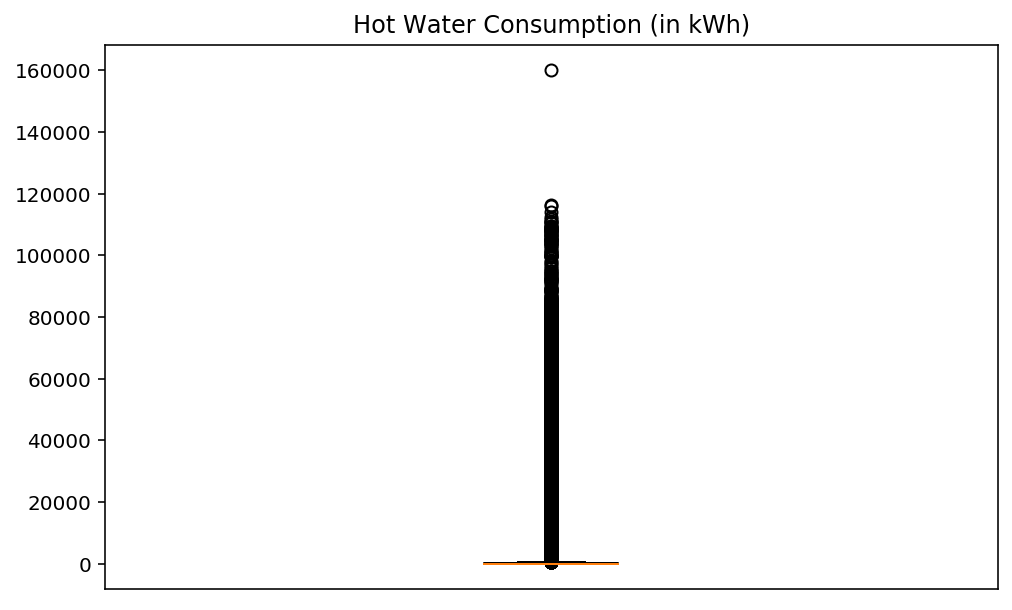

In [25]:
# Display a description of hot water consumption:
print("*** Statistics summary for hot water consumption:")
display(hot_water.describe())

# Hot water consumption graph:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Hot Water Consumption (in kWh)")
ax.boxplot(hot_water)
ax.get_xaxis().set_visible(False)
fig.savefig('../graphs/hot_water_consumption.png', bbox_inches='tight')

# Determine number of outliers:
p_25, p_75 = np.percentile(hot_water, [25, 75])
iqr = p_75 - p_25
lower_bound, upper_bound  = p_25 - 1.5 * iqr, p_75 + 1.5 * iqr
hot_water_outliers = 0
for i in hot_water:
    if (i < lower_bound) or (i > upper_bound):
        hot_water_outliers = hot_water_outliers + 1
print("\n*** Hot water consumption counts {} outliers (proportion: {:.2f}%).\n".format(hot_water_outliers, float(hot_water_outliers)/len(hot_water)*100.))

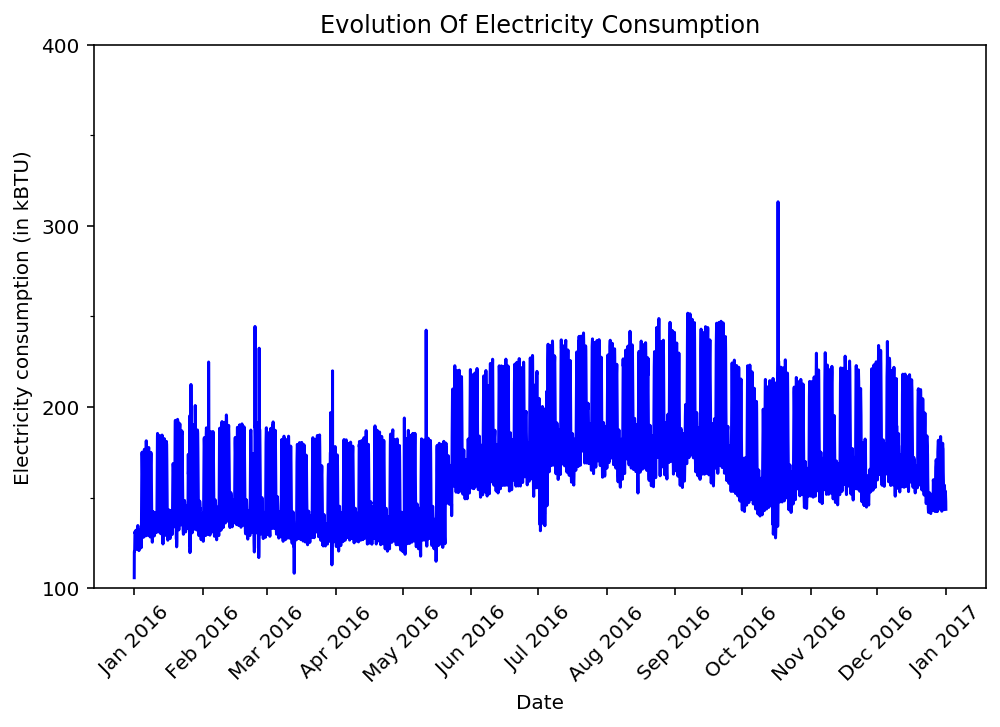

In [26]:
# Configure some variables:
meter_0_tmp = meter_0.drop(['building_id', 'meter'], axis=1)
meter_0_new = meter_0_tmp.groupby('timestamp').mean()
electricity = meter_0_new['meter_reading'].tolist()
timestamp = pd.to_datetime(meter_0_new.index)

# Definition of the graph:
fig, ax = plt.subplots(figsize=(8, 5))

# Configuration of the graph:
ax.set_title("Evolution Of Electricity Consumption")
ax.plot(timestamp, electricity, color='blue', linestyle='solid')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel('Date')
ax.set_ylim(100, 400)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(3))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(6))
ax.set_ylabel('Electricity consumption (in kBTU)')

# Save the graph:
fig.savefig('../graphs/evolution_electricity_consumption.png', bbox_inches='tight')

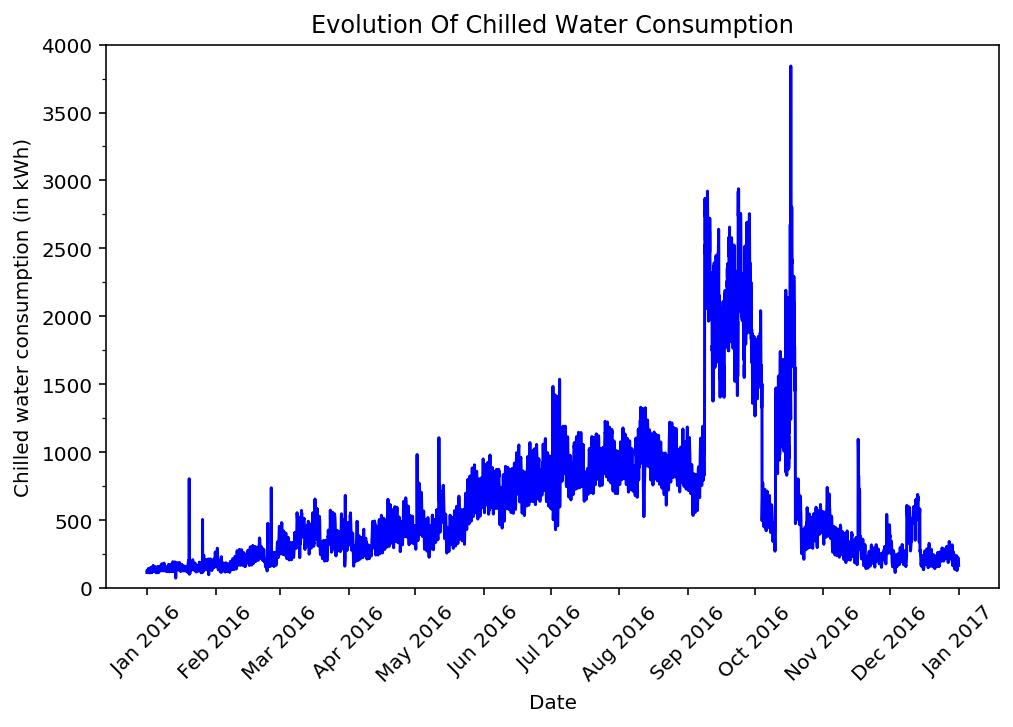

In [27]:
# Configure some variables:
meter_1_tmp = meter_1.drop(['building_id', 'meter'], axis=1)
meter_1_new = meter_1_tmp.groupby('timestamp').mean()
chilled_water = meter_1_new['meter_reading'].tolist()
timestamp = pd.to_datetime(meter_1_new.index)

# Definition of the graph:
fig, ax = plt.subplots(figsize=(8, 5))

# Configuration of the graph:
ax.set_title("Evolution Of Chilled Water Consumption")
ax.plot(timestamp, chilled_water, color='blue', linestyle='solid')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel('Date')
ax.set_ylim(0, 4000)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(8))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(16))
ax.set_ylabel('Chilled water consumption (in kWh)')

# Save the graph:
fig.savefig('../graphs/evolution_chilled_water_consumption.png', bbox_inches='tight')

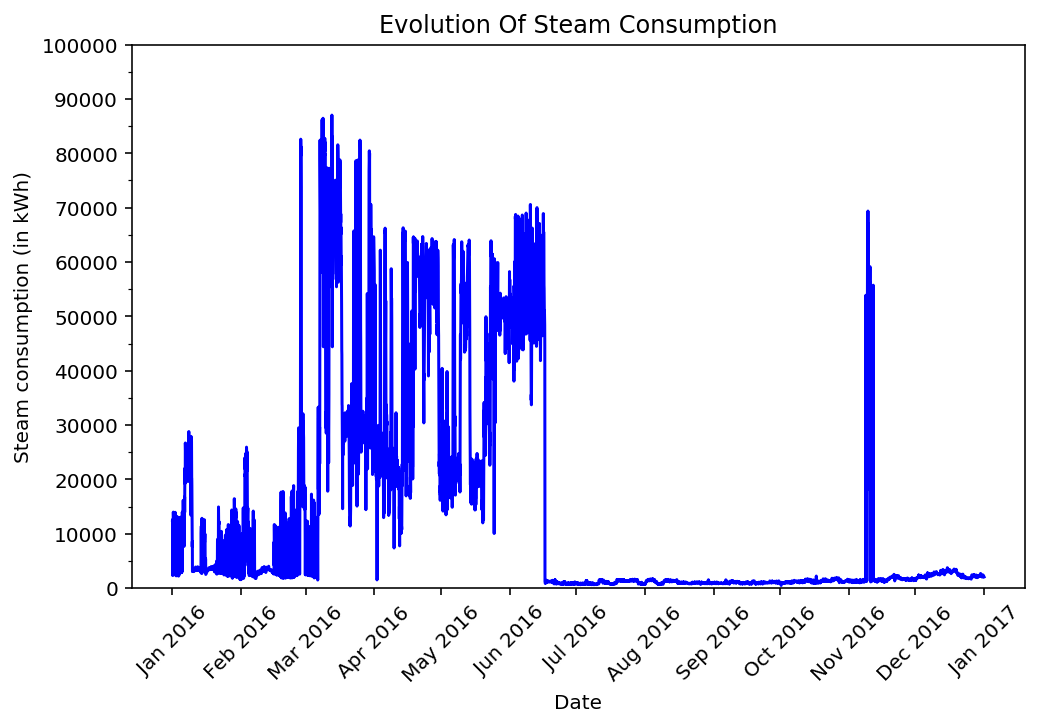

In [28]:
# Configure some variables:
meter_2_tmp = meter_2.drop(['building_id', 'meter'], axis=1)
meter_2_new = meter_2_tmp.groupby('timestamp').mean()
steam = meter_2_new['meter_reading'].tolist()
timestamp = pd.to_datetime(meter_2_new.index)

# Definition of the graph:
fig, ax = plt.subplots(figsize=(8, 5))

# Configuration of the graph:
ax.set_title("Evolution Of Steam Consumption")
ax.plot(timestamp, steam, color='blue', linestyle='solid')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel('Date')
ax.set_ylim(0, 100000)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(20))
ax.set_ylabel('Steam consumption (in kWh)')

# Save the graph:
fig.savefig('../graphs/evolution_steam_consumption.png', bbox_inches='tight')

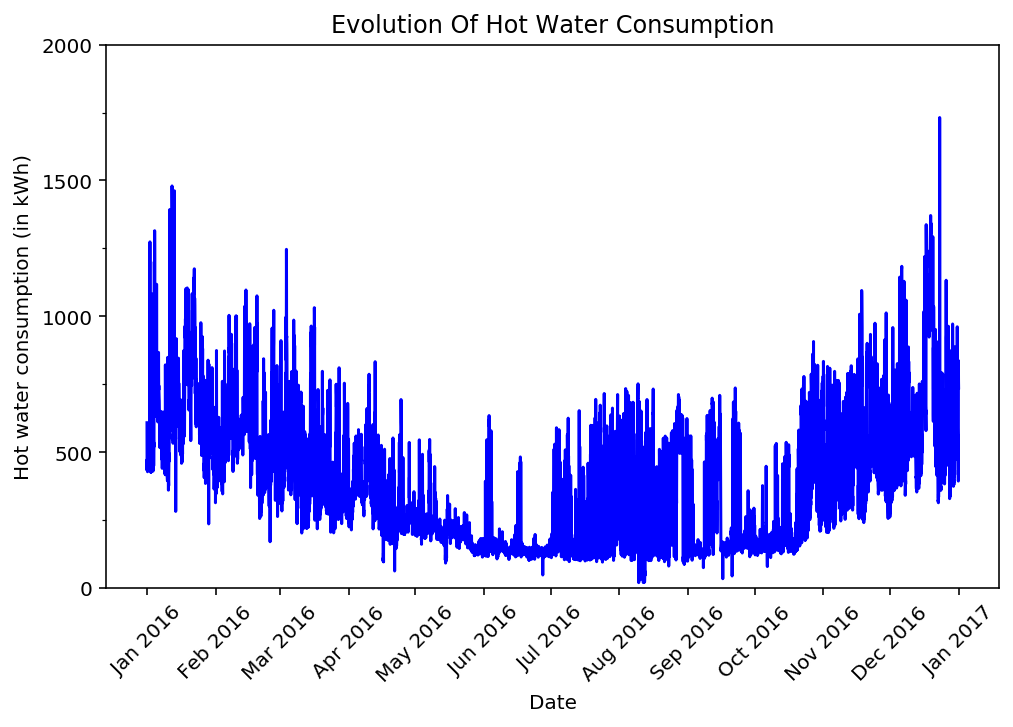

In [29]:
# Configure some variables:
meter_3_tmp = meter_3.drop(['building_id', 'meter'], axis=1)
meter_3_new = meter_3_tmp.groupby('timestamp').mean()
hot_water = meter_3_new['meter_reading'].tolist()
timestamp = pd.to_datetime(meter_3_new.index)

# Definition of the graph:
fig, ax = plt.subplots(figsize=(8, 5))

# Configuration of the graph:
ax.set_title("Evolution Of Hot Water Consumption")
ax.plot(timestamp, hot_water, color='blue', linestyle='solid')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel('Date')
ax.set_ylim(0, 2000)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
ax.set_ylabel('Hot water consumption (in kWh)')

# Save the graph:
fig.savefig('../graphs/evolution_hot_water_consumption.png', bbox_inches='tight')

### Analysis

From this exploration about the train dataframe, four major conclusions can be stated:
* The energy meter repartition is not well balanced, this is not really an issue because we are going to build four prediction models (one for each energy type), nevertheless, we can already suppose that the one we will build for electricity consumption prediction will probably be better than the one we will build for hot water consumption prediction, at least, we will benefit from more data to train the first one than we will benefit for training the second one.
* We can observe an high versatility on energy consumption data we benefit from, element that can be observed for each one of the four energy types (we note a proportion of outliers superior to 10% for each one of them), we can thus already say that this will be a challenging point to handle for the prediction models we will build.
* For this study, we benefit from one year of registered data, as we have previously noted when discussing weather conditions, this will have an impact on the the prediction models we will build (see discussion above).
* The graph exposing the evolution of steam consumption over the year used for this study seems quite "strange". Indeed, from june to december (with a very strange "Dirac epiphenomena" in November), it seems like if steam consumption meters have been inactive. This will probably have a huge impact on the prediction model we will build.